# Exploratory Data Analysis (EDA)


#### Benjamin Robin 7/13/2024
#### https://github.com/BenjaminRobin22/Robin_Capstone

##### 1. Importing cleaned file from the ETL phase

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# bringing in my CSV file
file_path = 'Cleaned_Life_Expectancy_Data.csv'

# Try different encodings if 'utf-8' fails
encodings = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']
for encoding in encodings:
    try:
        data = pd.read_csv(file_path, encoding=encoding)
        print(f'Successfully loaded with {encoding} encoding')
        break
    except UnicodeDecodeError as e:
        print(f'Error with {encoding} encoding: {e}')

# Display the first few rows of the dataframe to confirm it loaded correctly
data.head()


Error with utf-8 encoding: 'utf-8' codec can't decode byte 0xf4 in position 1: invalid continuation byte
Successfully loaded with latin1 encoding


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,region,sub-region
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,1154,19.1,83,6.0,65.0,0.1,17.2,17.3,0.479,10.1,Asia,Southern Asia
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,492,18.6,86,58.0,62.0,0.1,17.5,17.5,0.476,10.0,Asia,Southern Asia
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,430,18.1,89,62.0,64.0,0.1,17.7,17.7,0.470,9.9,Asia,Southern Asia
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,2787,17.6,93,67.0,67.0,0.1,17.9,18.0,0.463,9.8,Asia,Southern Asia
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,3013,17.2,97,68.0,68.0,0.1,18.2,18.2,0.454,9.5,Asia,Southern Asia


In [6]:
data.shape

(2928, 20)

In [7]:
# Display the count of unique values in each column
unique_counts = data.nunique()
print("Count of Unique Values in Each Column:")
print(unique_counts)

# Display the data types of each column
data_types = data.dtypes
print("\nData Types of Each Column:")
print(data_types)

Count of Unique Values in Each Column:
Country                             183
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1241
percentage expenditure             2323
Measles                             958
BMI                                 603
under-five deaths                   252
Polio                                75
Diphtheria                           83
HIV/AIDS                            200
thinness  1-19 years                201
thinness 5-9 years                  208
Income composition of resources     632
Schooling                           180
region                                5
sub-region                           17
dtype: int64

Data Types of Each Column:
Country                             object
Year                                 int64
Status                            

In [8]:
unique_years = data['Year'].unique()
print("Unique Years in the Dataset:")
print(unique_years)

Unique Years in the Dataset:
[2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002
 2001 2000]


##### 2. Adding population back into the data set and calculating per capita stats 

In [9]:
# Load the population dataset
population_file = 'Populations.csv'
population_data = pd.read_csv(population_file)
# Merge the datasets using a left join on 'Country' and 'Year'
merged_data = pd.merge(data, population_data[['Country', 'Year', 'Population']], 
                       left_on=['Country', 'Year'], right_on=['Country', 'Year'], how='left')


# Display the first few rows of the merged dataset to confirm the merge
print(merged_data.head())
# Saving the merged dataset to a new CSV file
merged_data.to_csv('Cleaned_Life_Expectancy_Data_Population.csv', index=False)

       Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0              263   
1  Afghanistan  2014  Developing             59.9              271   
2  Afghanistan  2013  Developing             59.9              268   
3  Afghanistan  2012  Developing             59.5              272   
4  Afghanistan  2011  Developing             59.2              275   

   infant deaths  Alcohol  percentage expenditure  Measles   BMI  ...  Polio  \
0             62     0.01               71.279624     1154  19.1  ...    6.0   
1             64     0.01               73.523582      492  18.6  ...   58.0   
2             66     0.01               73.219243      430  18.1  ...   62.0   
3             69     0.01               78.184215     2787  17.6  ...   67.0   
4             71     0.01                7.097109     3013  17.2  ...   68.0   

   Diphtheria  HIV/AIDS  thinness  1-19 years  thinness 5-9 years  \
0        65.0       0.1      

In [ ]:
# Print the number of null values in the 'Population' column
null_values_population = merged_data['Population'].isnull().sum()
print(f"Number of null values in the 'Population' column: {null_values_population}")

Number of null values in the 'Population' column: 0


In [ ]:
data = pd.read_csv(file_path)
# Display the first few rows of the dataframe to confirm it loaded correctly
data.head()

In [ ]:
# Calculate 'infant deaths per capita' and add it as a new column
merged_data['infant deaths per capita'] = merged_data['infant deaths'] / merged_data['Population']
merged_data.head

<bound method NDFrame.head of           Country  Year      Status  Life expectancy  Adult Mortality  \
0     Afghanistan  2015  Developing             65.0            263.0   
1     Afghanistan  2014  Developing             59.9            271.0   
2     Afghanistan  2013  Developing             59.9            268.0   
3     Afghanistan  2012  Developing             59.5            272.0   
4     Afghanistan  2011  Developing             59.2            275.0   
...           ...   ...         ...              ...              ...   
2923     Zimbabwe  2004  Developing             44.3            723.0   
2924     Zimbabwe  2003  Developing             44.5            715.0   
2925     Zimbabwe  2002  Developing             44.8             73.0   
2926     Zimbabwe  2001  Developing             45.3            686.0   
2927     Zimbabwe  2000  Developing             46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Measles   BMI  ...  \
0                

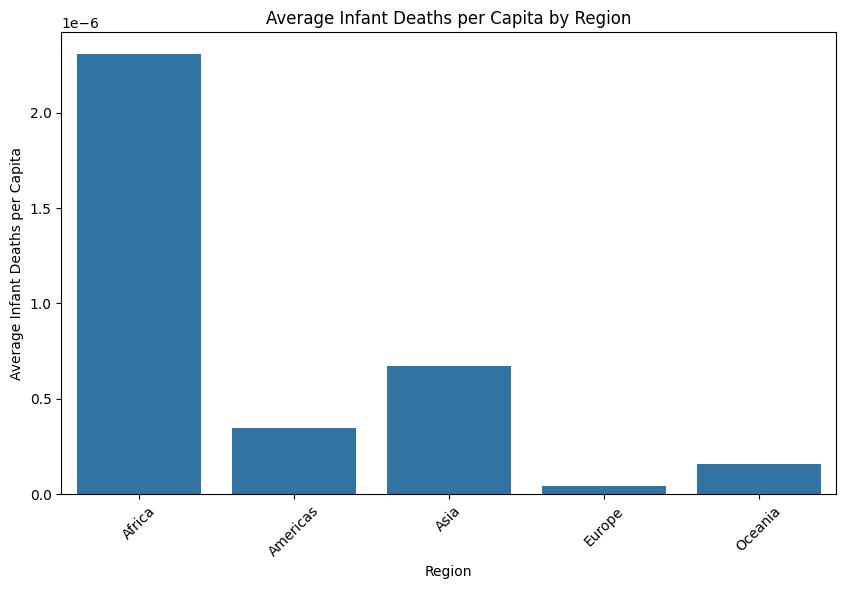

In [ ]:
# creating a bar chart that shows average infant deaths per capital by region
avg_infant_deaths_per_capita = merged_data.groupby('region')['infant deaths per capita'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='infant deaths per capita', data=avg_infant_deaths_per_capita)
plt.title('Average Infant Deaths per Capita by Region')
plt.xlabel('Region')
plt.ylabel('Average Infant Deaths per Capita')
plt.xticks(rotation=45)
plt.show()

##### 3. Visulizing data distribution relationally

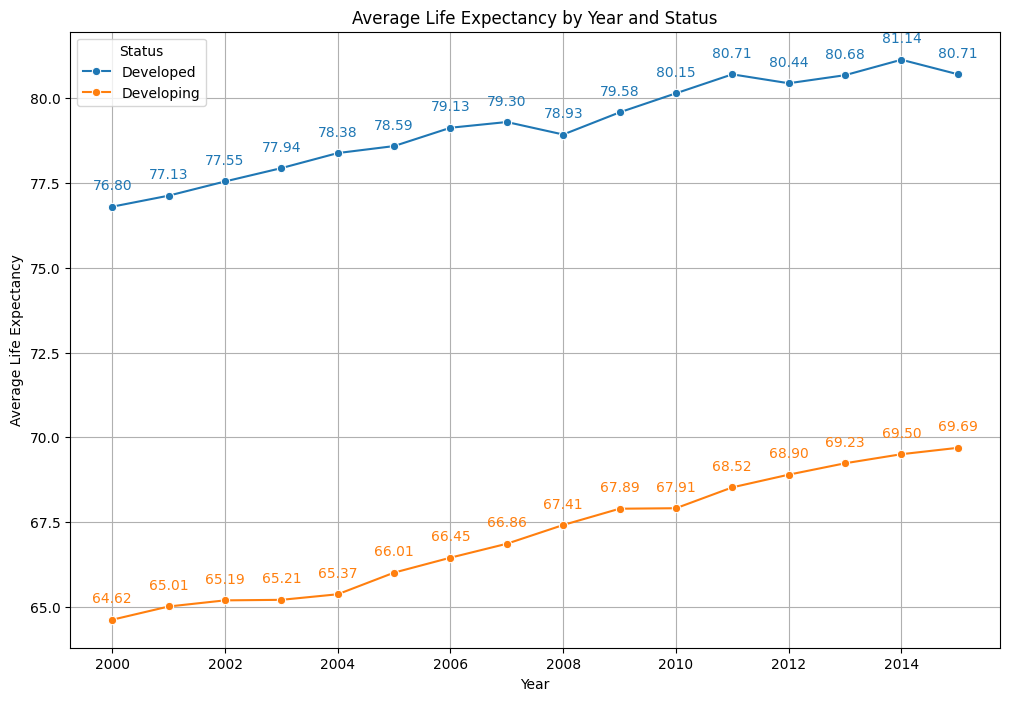

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average 'life expectancy' by 'year' and 'Status'
avg_life_expectancy_by_status = merged_data.groupby(['Year', 'Status'])['Life expectancy'].mean().reset_index()

# Create the line graph
plt.figure(figsize=(12, 8))
line_plot = sns.lineplot(data=avg_life_expectancy_by_status, x='Year', y='Life expectancy', hue='Status', marker='o')

# Add plot labels
for line in line_plot.lines:
    line.set_label(line.get_label())
    for x_data, y_data in zip(line.get_xdata(), line.get_ydata()):
        line_plot.text(x_data, y_data + 0.5, f'{y_data:.2f}', color=line.get_color(), ha="center")

# Customize the plot
plt.title('Average Life Expectancy by Year and Status')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.legend(title='Status')
plt.grid(True)
plt.show()


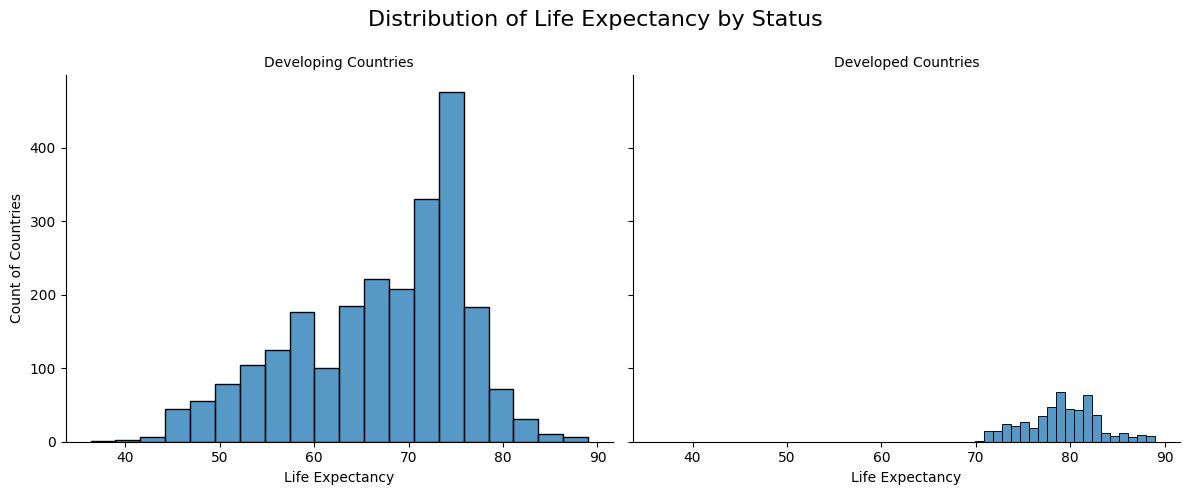

In [ ]:
# Create a FacetGrid to display side-by-side histograms based on 'Status'
g = sns.FacetGrid(data, col='Status', height=5, aspect=1.2)
g.map(sns.histplot, 'Life expectancy', bins=20, kde=False)

# Customize the plots
g.set_axis_labels('Life Expectancy', 'Count of Countries')
g.set_titles(col_template='{col_name} Countries')
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Distribution of Life Expectancy by Status', fontsize=16)
plt.show()

In [ ]:
# Trim spaces before and after column names
merged_data.columns = merged_data.columns.str.strip()

# Check column names to ensure the correct ones are used
print(merged_data.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Diphtheria', 'HIV/AIDS',
       'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'region', 'sub-region',
       'Population', 'infant deaths per capita'],
      dtype='object')


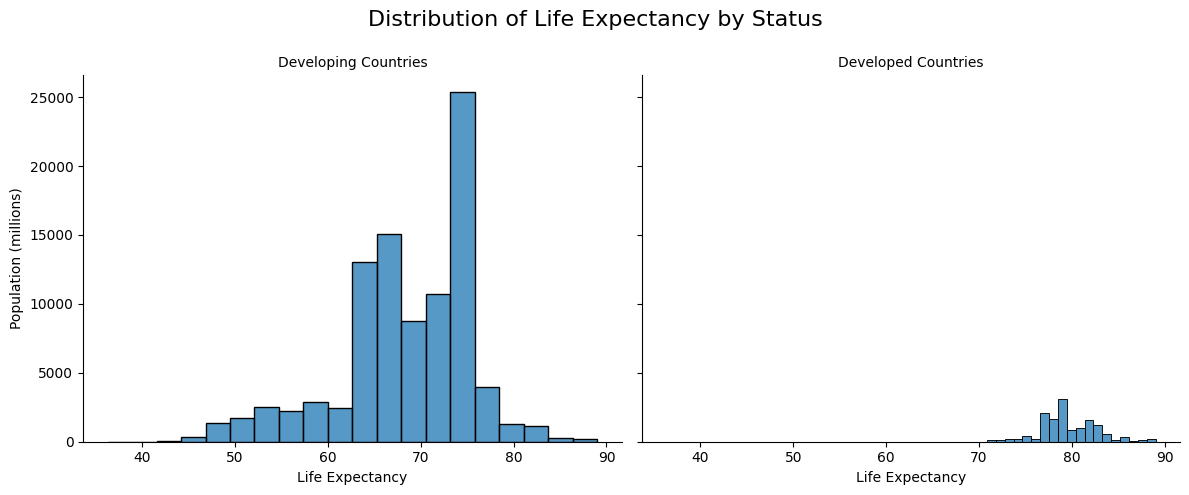

In [ ]:
# Create a FacetGrid to display side-by-side histograms based on 'Status'
g = sns.FacetGrid(merged_data, col='Status', height=5, aspect=1.2)

# Define a custom plotting function to sum populations in millions
def plot_hist(data, **kwargs):
    data = data.copy()
    data['Population (millions)'] = data['Population'] / 1_000_000
    sns.histplot(data=data, x='Life expectancy', weights='Population (millions)', bins=20, kde=False)

# Apply the custom plotting function to the FacetGrid
g.map_dataframe(plot_hist)

# Customize the plots
g.set_axis_labels('Life Expectancy', 'Population (millions)')
g.set_titles(col_template='{col_name} Countries')
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Distribution of Life Expectancy by Status', fontsize=16)
plt.show()

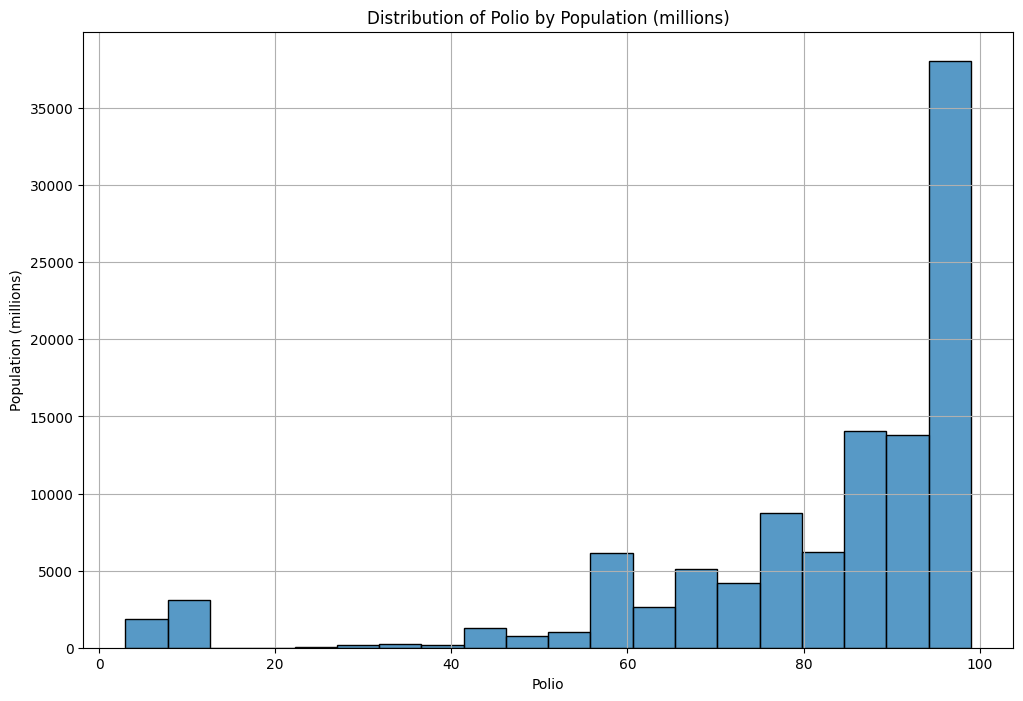

In [ ]:
# Convert population to millions
merged_data['Population (millions)'] = merged_data['Population'] / 1_000_000

# Plot the distribution of 'Polio' by 'Population' in millions
plt.figure(figsize=(12, 8))
sns.histplot(data=merged_data, x='Polio', weights='Population (millions)', bins=20, kde=False)

# Customize the plot
plt.title('Distribution of Polio by Population (millions)')
plt.xlabel('Polio')
plt.ylabel('Population (millions)')
plt.grid(True)
plt.show()

##### 4. Exposing trends in the data. Looking for direct relationships with life expectancy from dependant variables

C:\Users\benja\AppData\Local\Temp\ipykernel_15692\389416918.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_data, x='sub-region', y='Polio', palette='tab20', order=avg_life_expectancy_per_subregion['sub-region'])


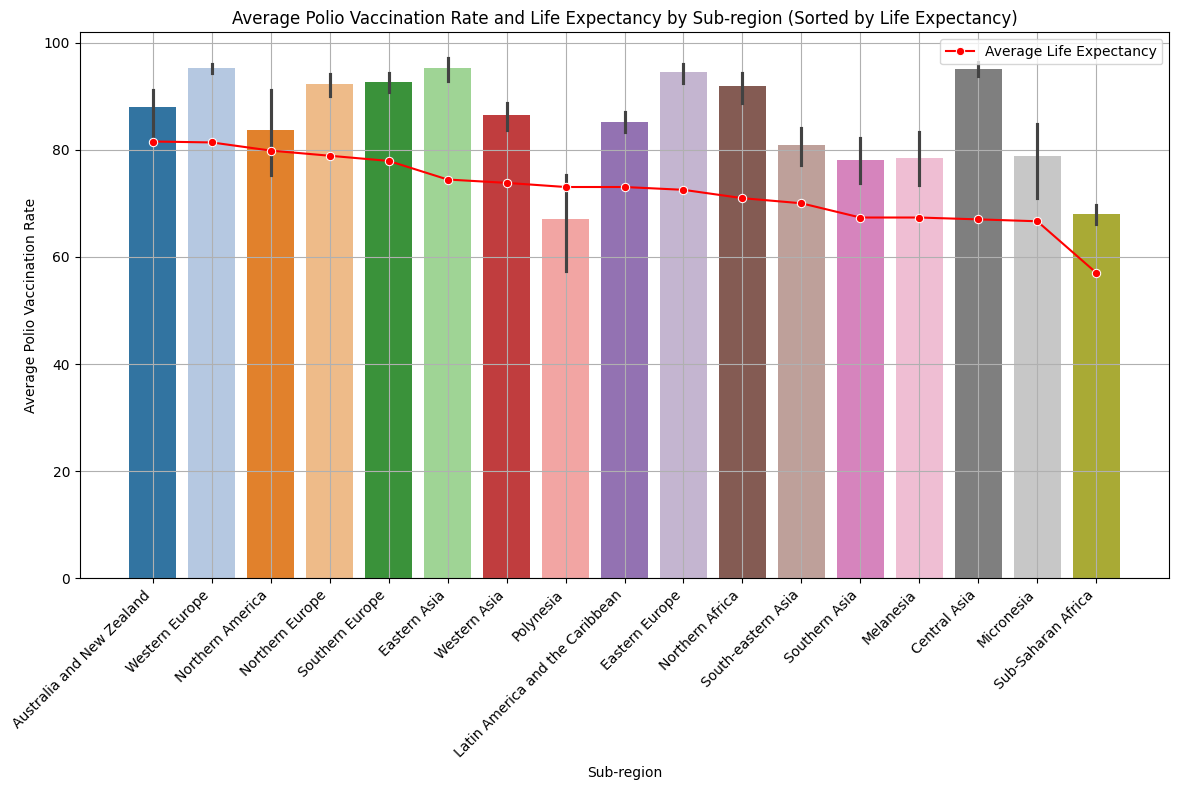

In [ ]:
# Calculate average life expectancy per sub-region
avg_life_expectancy_per_subregion = merged_data.groupby('sub-region')['Life expectancy'].mean().reset_index()

# Sort by average life expectancy in descending order
avg_life_expectancy_per_subregion = avg_life_expectancy_per_subregion.sort_values(by='Life expectancy', ascending=False)

# Plot the bar plot for Polio vaccination rates
plt.figure(figsize=(12, 8))
sns.barplot(data=merged_data, x='sub-region', y='Polio', palette='tab20', order=avg_life_expectancy_per_subregion['sub-region'])

# Overlay line plot for average life expectancy per sub-region
sns.lineplot(data=avg_life_expectancy_per_subregion, x='sub-region', y='Life expectancy', marker='o', color='red', label='Average Life Expectancy')

# Customize the plot
plt.title('Average Polio Vaccination Rate and Life Expectancy by Sub-region (Sorted by Life Expectancy)')
plt.xlabel('Sub-region')
plt.ylabel('Average Polio Vaccination Rate')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
if 'Measles' in merged_data.columns and 'Population' in merged_data.columns:
    # Create a new column 'Measles_per_Million'
    merged_data['Measles_per_Million'] = (merged_data['Measles'] / merged_data['Population']) * 1_000_000
    print("New column 'Measles_per_Million' added successfully.")
else:
    print("Error: 'Measles' or 'Population' column not found in the DataFrame.")

# Display the first few rows of the updated DataFrame to confirm
merged_data.head()


New column 'Measles_per_Million' added successfully.


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,...,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,region,sub-region,Population,Measles_per_Million
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,1154,19.1,...,65.0,0.1,17.2,17.3,0.479,10.1,Asia,Southern Asia,33753499,34.189048
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,492,18.6,...,62.0,0.1,17.5,17.5,0.476,10.0,Asia,Southern Asia,32716210,15.038417
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,430,18.1,...,64.0,0.1,17.7,17.7,0.470,9.9,Asia,Southern Asia,31541209,13.632959
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,2787,17.6,...,67.0,0.1,17.9,18.0,0.463,9.8,Asia,Southern Asia,30466479,91.477588
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,3013,17.2,...,68.0,0.1,18.2,18.2,0.454,9.5,Asia,Southern Asia,29249157,103.011516


In [28]:
# Ensure the columns are correctly named and exist in the DataFrame
if 'HIV/AIDS' in merged_data.columns and 'Population' in merged_data.columns:
    # Drop the 'HIV/AIDS_per_Million' column if it exists
    if 'HIV/AID_per_Million' in merged_data.columns:
        merged_data.drop(columns=['HIV/AID_per_Million'], inplace=True)
        print("'HIV/AIDS_per_Million' column dropped successfully.")
    
    # Create a new column 'HIV/AIDS_per_10Million'
    merged_data['HIV/AIDS_per_10Million'] = (merged_data['HIV/AIDS'] / merged_data['Population']) * 10_000_000
    print("New column 'HIV/AIDS_per_10Million' added successfully.")
else:
    print("Error: 'HIV/AIDS' or 'Population' column not found in the DataFrame.")

# Display the first few rows of the updated DataFrame to confirm
merged_data.head()

'HIV/AIDS_per_Million' column dropped successfully.
New column 'HIV/AIDS_per_10Million' added successfully.


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,...,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,region,sub-region,Population,Measles_per_Million,HIV/AIDS_per_10Million
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,1154,19.1,...,0.1,17.2,17.3,0.479,10.1,Asia,Southern Asia,33753499,34.189048,0.029627
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,492,18.6,...,0.1,17.5,17.5,0.476,10.0,Asia,Southern Asia,32716210,15.038417,0.030566
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,430,18.1,...,0.1,17.7,17.7,0.470,9.9,Asia,Southern Asia,31541209,13.632959,0.031705
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,2787,17.6,...,0.1,17.9,18.0,0.463,9.8,Asia,Southern Asia,30466479,91.477588,0.032823
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,3013,17.2,...,0.1,18.2,18.2,0.454,9.5,Asia,Southern Asia,29249157,103.011516,0.034189


C:\Users\benja\AppData\Local\Temp\ipykernel_6212\2564802320.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_data, x='sub-region', y='Measles_per_Million', palette='tab20', order=avg_life_expectancy_per_subregion['sub-region'])


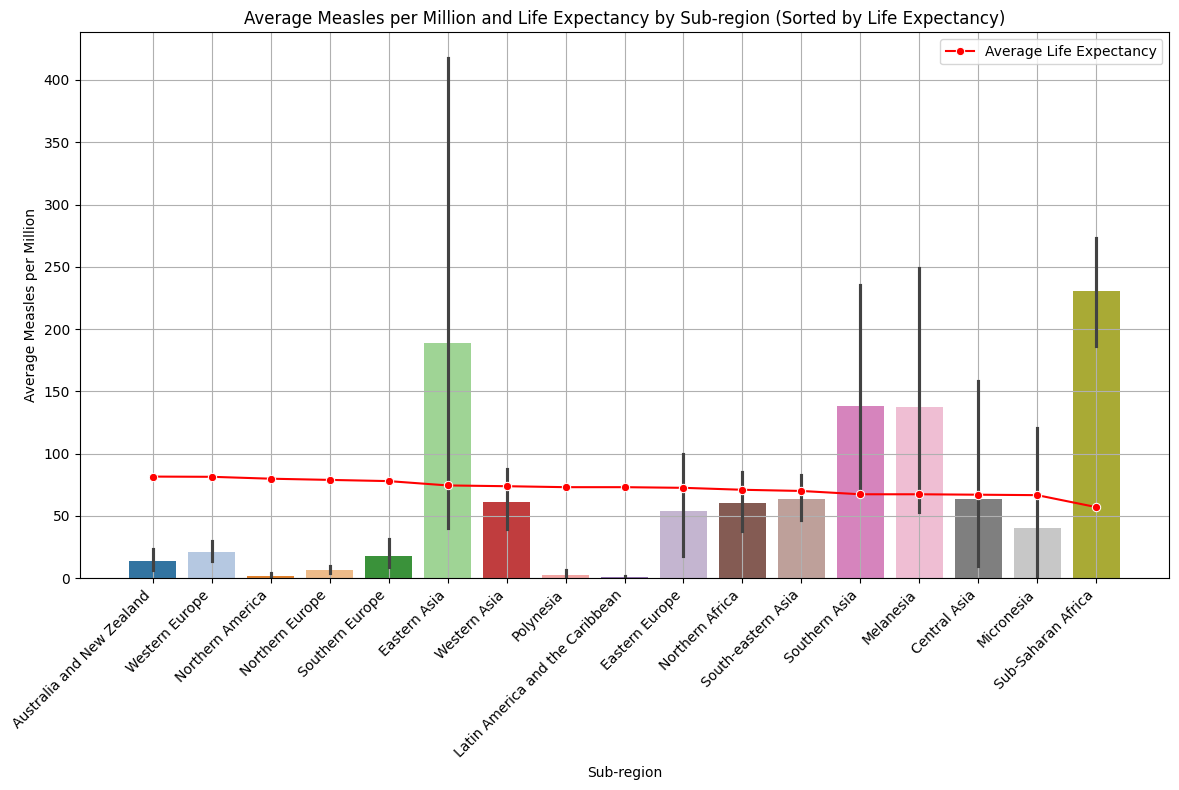

In [20]:
# Calculate average life expectancy per sub-region
avg_life_expectancy_per_subregion = merged_data.groupby('sub-region')['Life expectancy'].mean().reset_index()

# Sort by average life expectancy in descending order
avg_life_expectancy_per_subregion = avg_life_expectancy_per_subregion.sort_values(by='Life expectancy', ascending=False)

# Plot the bar plot for Measles per Million
plt.figure(figsize=(12, 8))
sns.barplot(data=merged_data, x='sub-region', y='Measles_per_Million', palette='tab20', order=avg_life_expectancy_per_subregion['sub-region'])

# Overlay line plot for average life expectancy per sub-region
sns.lineplot(data=avg_life_expectancy_per_subregion, x='sub-region', y='Life expectancy', marker='o', color='red', label='Average Life Expectancy')

# Customize the plot
plt.title('Average Measles per Million and Life Expectancy by Sub-region (Sorted by Life Expectancy)')
plt.xlabel('Sub-region')
plt.ylabel('Average Measles per Million')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

C:\Users\benja\AppData\Local\Temp\ipykernel_6212\3762749632.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_data, x='sub-region', y='Diphtheria', palette='tab20', order=avg_life_expectancy_per_subregion['sub-region'])


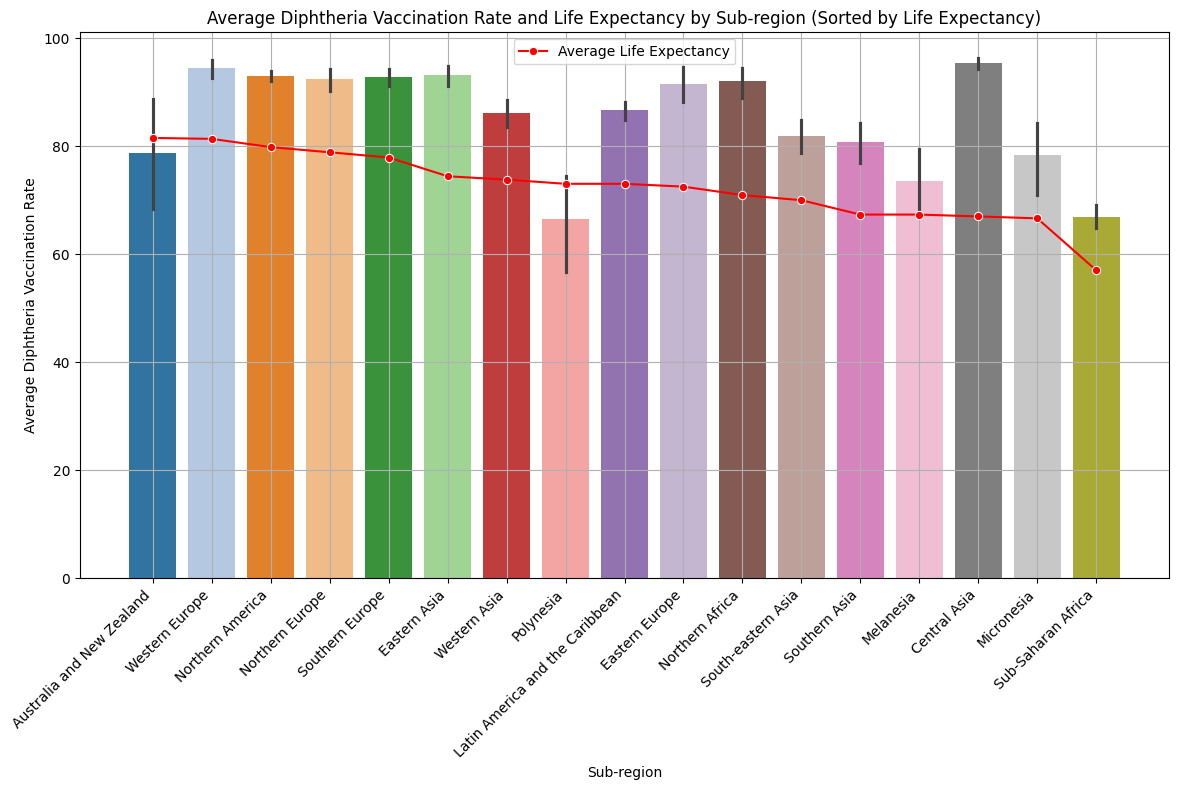

In [21]:
# Calculate average life expectancy per sub-region
avg_life_expectancy_per_subregion = merged_data.groupby('sub-region')['Life expectancy'].mean().reset_index()

# Sort by average life expectancy in descending order
avg_life_expectancy_per_subregion = avg_life_expectancy_per_subregion.sort_values(by='Life expectancy', ascending=False)

# Plot the bar plot for Polio vaccination rates
plt.figure(figsize=(12, 8))
sns.barplot(data=merged_data, x='sub-region', y='Diphtheria', palette='tab20', order=avg_life_expectancy_per_subregion['sub-region'])

# Overlay line plot for average life expectancy per sub-region
sns.lineplot(data=avg_life_expectancy_per_subregion, x='sub-region', y='Life expectancy', marker='o', color='red', label='Average Life Expectancy')

# Customize the plot
plt.title('Average Diphtheria Vaccination Rate and Life Expectancy by Sub-region (Sorted by Life Expectancy)')
plt.xlabel('Sub-region')
plt.ylabel('Average Diphtheria Vaccination Rate')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

C:\Users\benja\AppData\Local\Temp\ipykernel_6212\2453469140.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_data, x='sub-region', y='HIV/AIDS_per_10Million', palette='tab20', order=avg_life_expectancy_per_subregion['sub-region'])


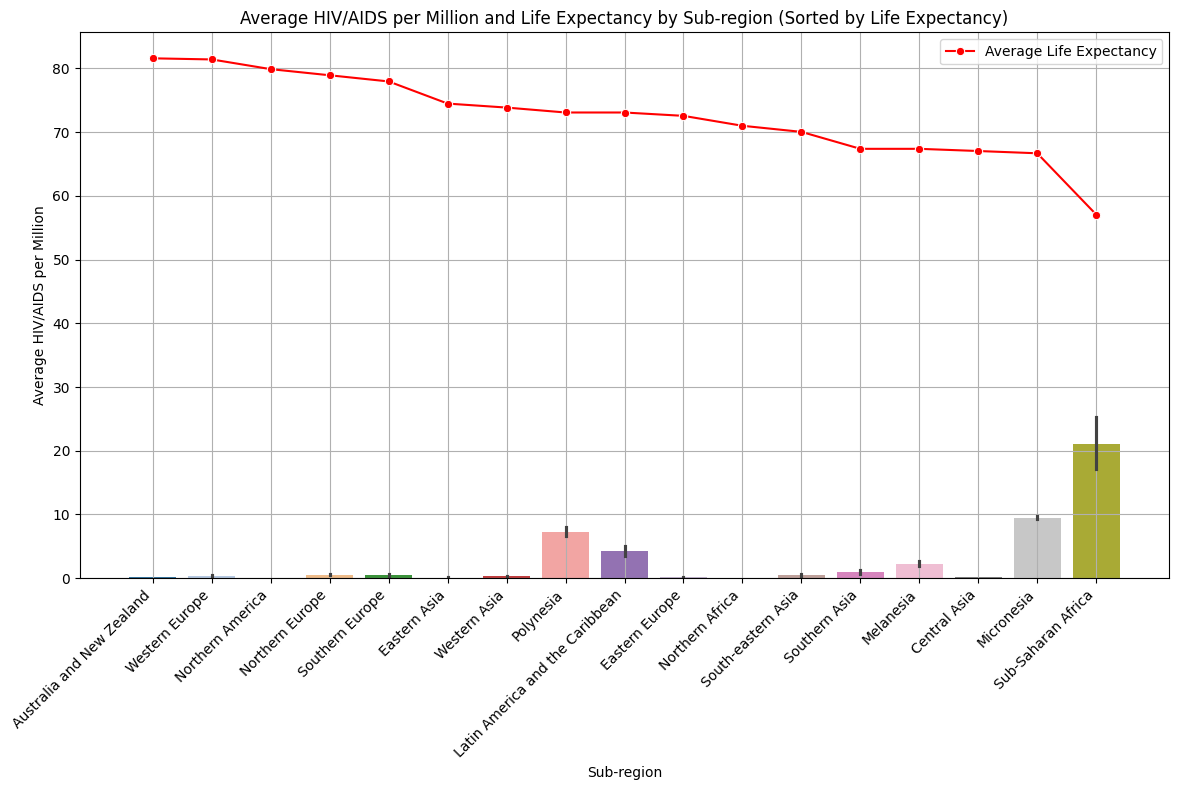

In [29]:
# Calculate average life expectancy per sub-region
avg_life_expectancy_per_subregion = merged_data.groupby('sub-region')['Life expectancy'].mean().reset_index()

# Sort by average life expectancy in descending order
avg_life_expectancy_per_subregion = avg_life_expectancy_per_subregion.sort_values(by='Life expectancy', ascending=False)

# Plot the bar plot for HIV/AIDS per million
plt.figure(figsize=(12, 8))
sns.barplot(data=merged_data, x='sub-region', y='HIV/AIDS_per_10Million', palette='tab20', order=avg_life_expectancy_per_subregion['sub-region'])

# Overlay line plot for average life expectancy per sub-region
sns.lineplot(data=avg_life_expectancy_per_subregion, x='sub-region', y='Life expectancy', marker='o', color='red', label='Average Life Expectancy')

# Customize the plot
plt.title('Average HIV/AIDS per Million and Life Expectancy by Sub-region (Sorted by Life Expectancy)')
plt.xlabel('Sub-region')
plt.ylabel('Average HIV/AIDS per Million')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

##### 5. Printing final data set so it is avaliable for the machine learning phase

In [30]:
# Save the merged_data DataFrame to a CSV file in the current folder
merged_data.to_csv('Final_Data_Set.csv', index=False)

print("Final Data Set saved successfully.")

Final Data Set saved successfully.
